# This document contains an example of creating animations

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
%matplotlib notebook

In [15]:
hard_lut_file = '../datasets/2019-03-18_zedboard_const/2019-03-18_hard-lut'
no_lut_file = '../datasets/2019-03-18_zedboard_const/2019-03-18_no-lut'
df_lut = pd.read_csv(hard_lut_file + '.csv',
                 names=['time', 'v1', 'v2'])
df_no_lut = pd.read_csv(no_lut_file + '.csv',
                 names=['time', 'v1', 'v2'])
df_no_lut.tail()

,time,v1,v2
399996,99.99900,-0.039474,-0.049817
399997,99.99925,-0.039435,-0.049788
399998,99.99950,-0.039396,-0.049760
399999,99.99975,-0.039356,-0.049731
400000,100.00000,-0.039315,-0.049703


<IPython.core.display.Javascript object>


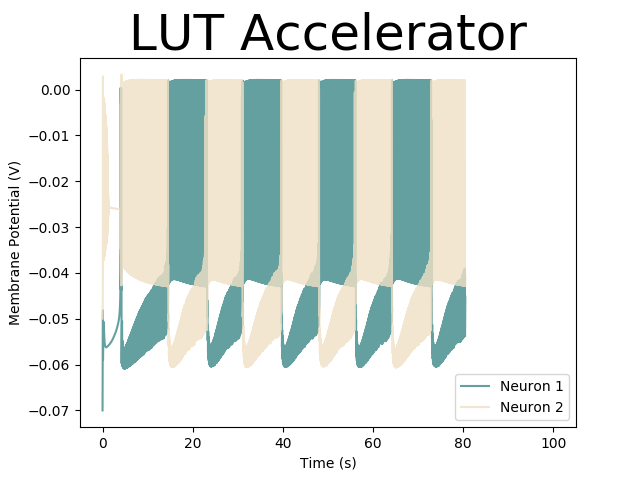

In [44]:
with_lut = True
both_v = True
save = False
speedup = 1.490

dataset = df_lut if with_lut else df_no_lut
myColor = '#3e8989' if with_lut else '#4281A4'
myColor2 = '#f1e0c5' if with_lut else '#7d6f86'
title = ('LUT Accelerator' if with_lut else 'No Accelerator')
suffix = '2' if both_v else ''
step = 1000*speedup if with_lut else 1000

plt.rcParams['axes.titlesize'] = 36

x = dataset['time'].values
y = dataset['v1'].values
y2 = dataset['v2'].values
fig, ax = plt.subplots()
line, = ax.plot(x, y, color=myColor, alpha=0.8)
if (both_v):
    line2, = ax.plot(x, y2, color=myColor2, alpha=.8)
else:
    line2 = ''
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title(title)
if (both_v):
    plt.legend(['Neuron 1','Neuron 2'], loc='lower right')

def update(num, x, y, y2, line, line2):
    line.set_data(x[:num*step], y[:num*step])
    if (both_v):
        line2.set_data(x[:num*step], y2[:num*step])
    return line,

ani = animation.FuncAnimation(fig, update, math.ceil(len(x_lut)/step), fargs=[x, y, y2, line, line2],
                              interval=20, blit=True, save_count=1)
if (save):
    from matplotlib.animation import FFMpegWriter
    writer = FFMpegWriter(fps=30, metadata=dict(artist='Josh Heidecker'), bitrate=1800)
    ani.save(title.replace(' ','')+suffix+'.mp4', writer=writer)

plt.show()